### Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/Asus/Downloads/ineu/pollution.csv")
df = pd.DataFrame(df)
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


Given Features are

year : year of data 

month : month of data

day : day of data

hour : hour of data

pm2.5 : Pollution Concentration,

DEWP : Dew Point

TEMP : Temperature

Pres : Pressure

cbwd : Combined Wind Direction

Iws : Cumulated wind speed

Is : Cumulated hours of Snow

Ir : Cumulated hours of rain

### Data Preprocessing

In [2]:
print(df.isna().sum())

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


In [3]:
df = df.iloc[:,1:]
df

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB
None


In [5]:
df['Iws'] = df['Iws'].astype('int64')
df['TEMP'] = df['TEMP'].astype('int64')
df['PRES'] = df['PRES'].astype('int64')
df['PRES']*=0.000987

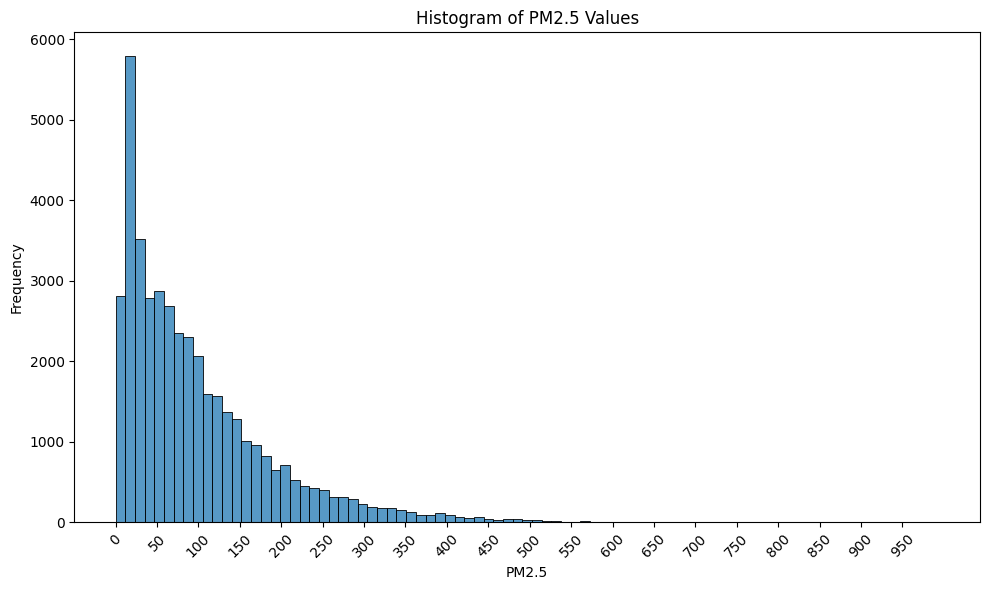

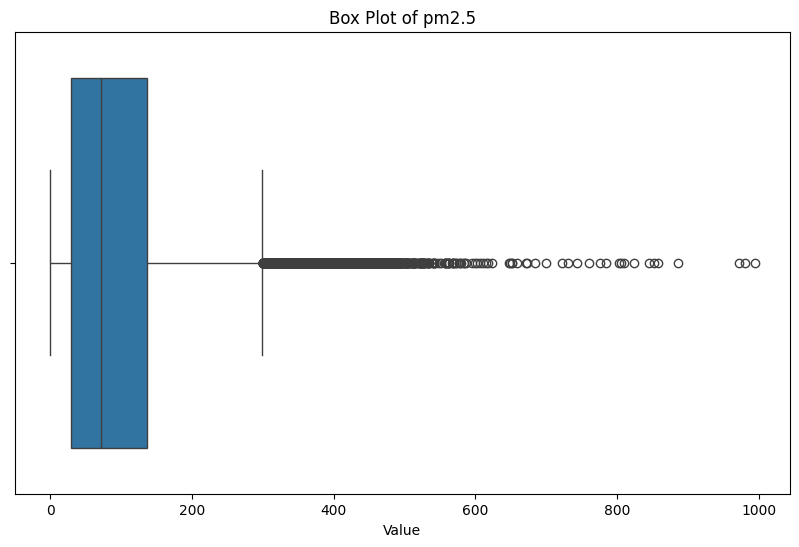

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='pm2.5', bins=85)  # Adjust the number of bins as needed
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

plt.title('Histogram of PM2.5 Values')
plt.xticks(range(0,1000,50))
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['pm2.5'])
plt.title('Box Plot of pm2.5')
plt.xlabel('Value')
plt.show()


Since distribution is right skewed and outliers exist replacing with median is more suited

In [7]:
df['pm2.5'].fillna(df['pm2.5'].median(),inplace=True)
df['pm2.5'] = df['pm2.5'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   43824 non-null  int64  
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  int64  
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  int64  
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 4.0+ MB


In [9]:
#cv is not valid wind direction , so all rows containing cv are replaced with valid data

counts = df['cbwd'].value_counts()
print(counts)
total_counts = counts['SE'] + counts['NW'] + counts['NE']

# Calculate proportions
se_proportion = counts['SE'] / total_counts
nw_proportion = counts['NW'] / total_counts
ne_proportion = counts['NE'] / total_counts

# Get indices of 'cv' values
cv_indices = df.index[df['cbwd'] == 'cv'].tolist()
num_cv = len(cv_indices)
# Generate replacement values
replacements = np.random.choice(['SE', 'NW', 'NE'], size=num_cv, p=[se_proportion, nw_proportion, ne_proportion])

# Replace 'cv' values
df.loc[cv_indices, 'cbwd'] = replacements

print(df['cbwd'].value_counts())

cbwd
SE    15290
NW    14150
cv     9387
NE     4997
Name: count, dtype: int64
cbwd
SE    19436
NW    18017
NE     6371
Name: count, dtype: int64


In [10]:
df.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,97.357977,1.817246,12.448499,1.003234,23.305654,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,90.030249,14.433440,12.198612,0.010135,50.051667,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,0.978117,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,0.994896,1.000000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1.002792,5.000000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1.011675,21.000000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1.032402,585.000000,27.000000,36.000000


In [11]:

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Encoding combined wind direction (cbwd)
df["cbwd"] = labelencoder.fit_transform(df["cbwd"])
df["cbwd"].unique()
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,72,-21,-11,1.007727,1,1,0,0
1,2010,1,1,1,72,-21,-12,1.006740,1,4,0,0
2,2010,1,1,2,72,-21,-11,1.005753,1,6,0,0
3,2010,1,1,3,72,-21,-14,1.005753,1,9,0,0
4,2010,1,1,4,72,-20,-12,1.004766,1,12,0,0


<Axes: >

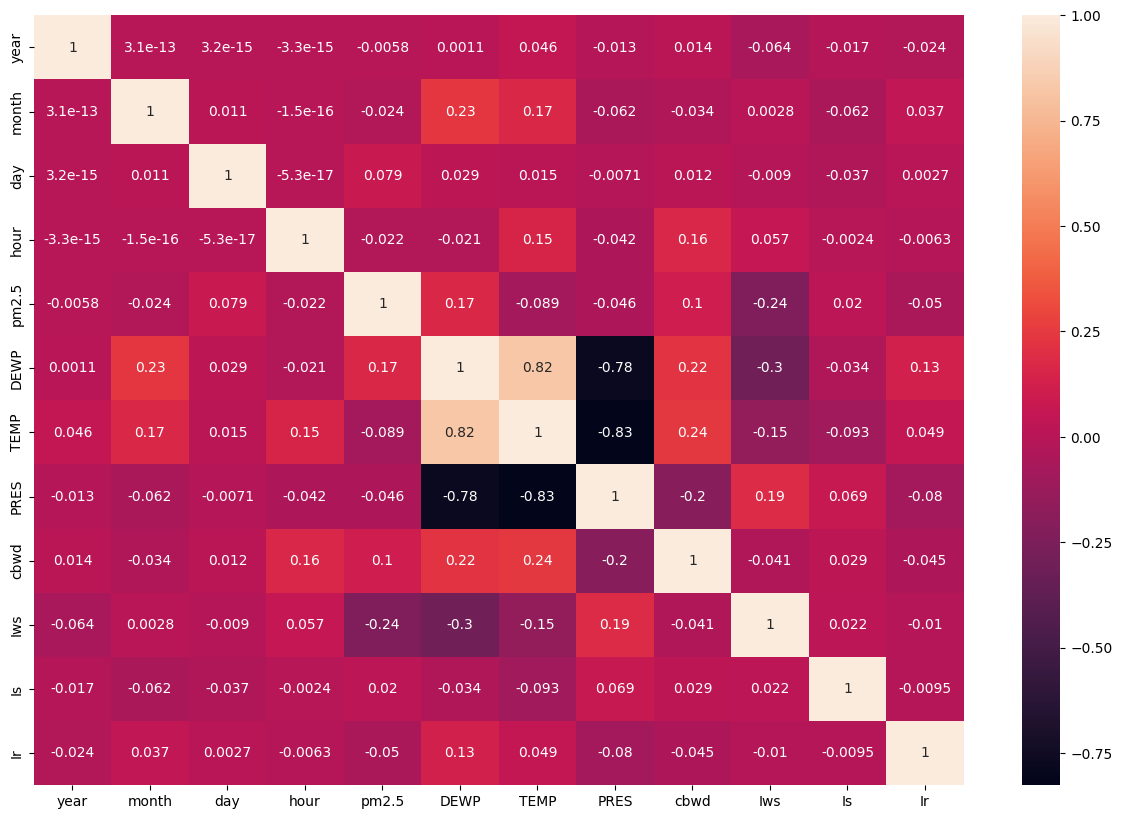

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

pm2.5 has highest negative correlation of 0.24 with Iws(windspeed)

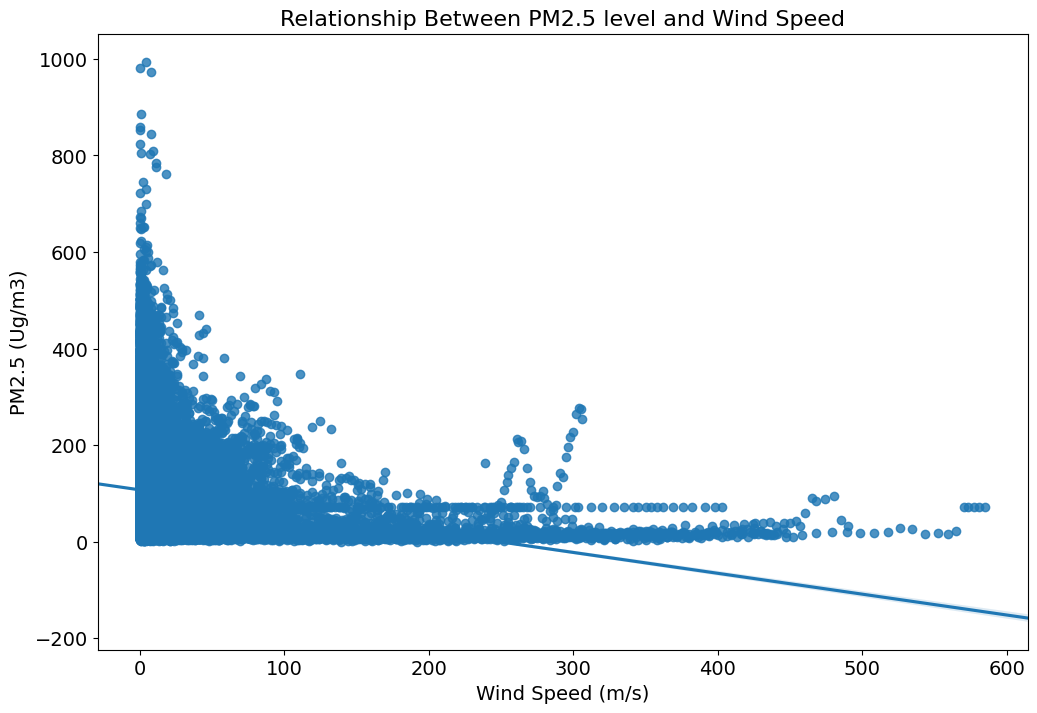

In [13]:
plt.figure(figsize= (12,8))
sns.regplot(x = 'Iws', y = 'pm2.5', data = df, truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('PM2.5 (Ug/m3)', fontsize = 14)
plt.xlabel("Wind Speed (m/s)", fontsize = 14)
plt.title("Relationship Between PM2.5 level and Wind Speed", fontsize= 16)
plt.show()

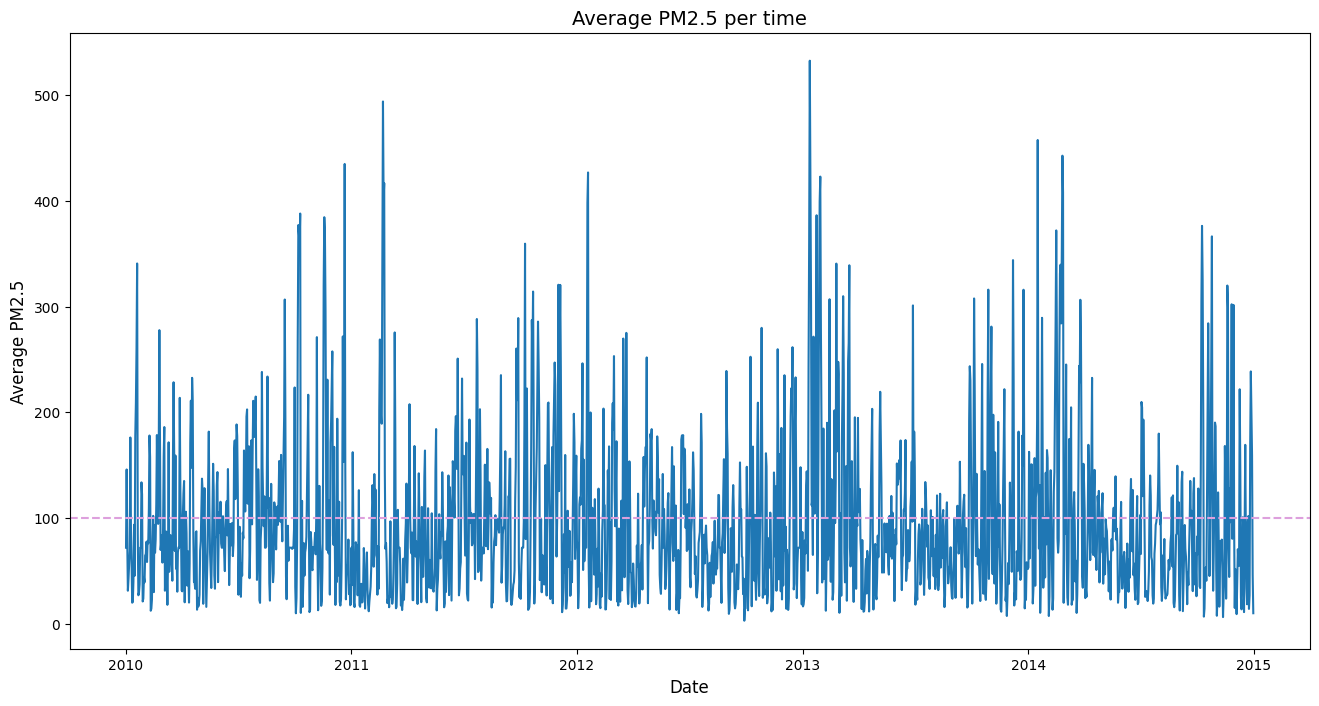

In [14]:
#Adding date column to better visualize pm2.5 year wise
date=df[['year','month','day']].apply(lambda x: '-'.join(x.values.astype(str)),axis='columns')
df.insert(5,'date',date)
df['date']=pd.to_datetime(df['date'])

date = df.groupby('date')['pm2.5'].mean()
plt.figure(figsize= [16, 8])
sns.lineplot(x = date.index, y = date)
plt.axhline(100, ls= '--', color= 'plum')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per time', fontsize = 14)
plt.show()

pm2.5 recorded highest in 2013

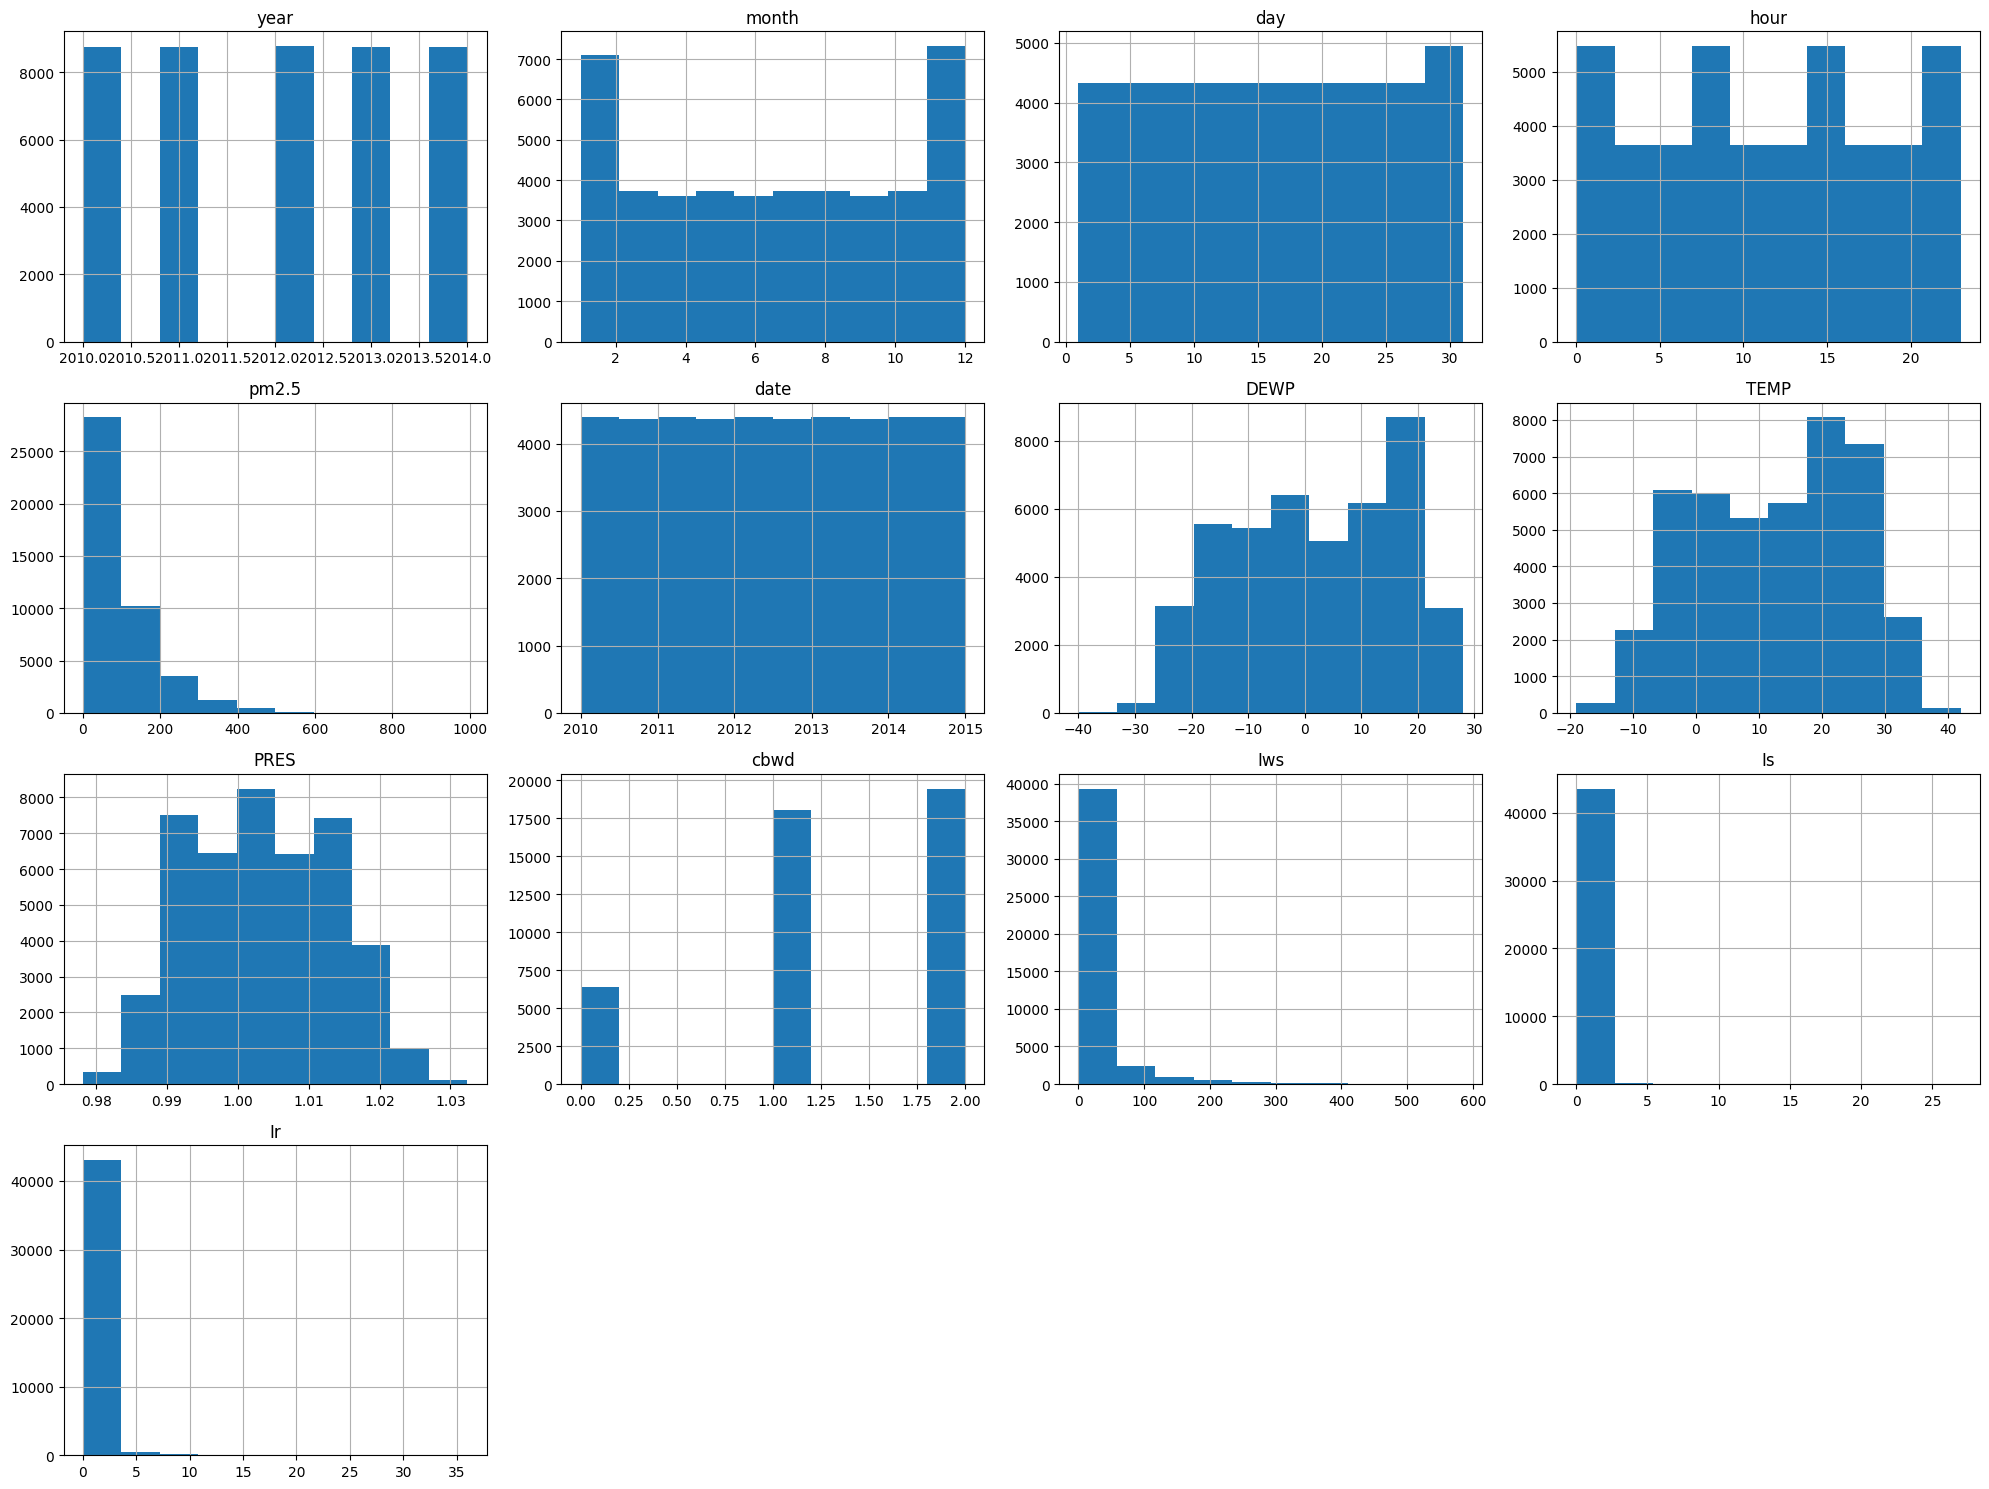

In [15]:
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

### Model Implementation

In [16]:
X=df.drop(['month','hour','day','date','pm2.5'],axis=1)
y=df['pm2.5']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#### Ridge Model

In [24]:
ridge=Ridge()
bagging_ridge=BaggingRegressor(estimator=ridge,random_state=42)
bagging_ridge.fit(X_train,y_train)
ypred_r=bagging_ridge.predict(X_test)

In [145]:
params={'n_estimators':[10,15,20,30],'max_features':[0.5,0.6,0.8,0.9],'max_samples':[0.7,0.75,0.8]}
grid=GridSearchCV(bagging_ridge,params,cv=5, scoring='r2')
grid.fit(X_train,y_train)

print("Best value for lambda : ",grid.best_params_)
print("Best score for cost function: ", grid.best_score_)

Best value for lambda :  {'max_features': 0.9, 'max_samples': 0.75, 'n_estimators': 10}
Best score for cost function:  0.23457469823255828


In [167]:
bagging_ridge_h=BaggingRegressor(estimator=ridge,max_features=0.9,max_samples=0.7,n_estimators=10)
bagging_ridge_h.fit(X_train,y_train)
ypred_rh=bagging_ridge_h.predict(X_test)

#### XGB Model

In [32]:
from xgboost import XGBRegressor

In [69]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
ypred_x=xgb.predict(X_test)

In [115]:
params={'lambda':[0.1,1,2,4,5],'n_estimator':[100,150,200],'eta':np.linspace(0.1,1,num=20)}
grid_xgb= GridSearchCV(estimator = xgb, param_grid = params, cv= 5,n_jobs=-1,scoring='r2')
grid_xgb.fit(X_train,y_train)

print("Best value for parameters : ",grid_xgb.best_params_)
print("Best score for cost function: ", grid_xgb.best_score_)

Best value for parameters :  {'eta': 0.43157894736842106, 'lambda': 4, 'n_estimator': 100}
Best score for cost function:  0.4732543017187031


In [116]:
xgbm=XGBRegressor(eta=0.431,reg_lambda=4,n_estimator=100)
xgbm.fit(X_train,y_train)
ypred_xgb=xgbm.predict(X_test)

#### Random Forest Model

In [123]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
ypred_rf=rf.predict(X_test)

In [140]:
rfh=RandomForestRegressor()
params={"max_depth" : [5,7,9,11],'min_samples_split': [2, 3,4,6],'min_samples_leaf': [1, 2,3, 4],'max_features':[0.6,0.8,'sqrt']}
grid= GridSearchCV(estimator = rfh, param_grid = params, cv= 5, verbose = 2,n_jobs=-1,scoring='r2')
grid.fit(X_train,y_train)

print("Best value for parameters : ",grid.best_params_)
print("Best score for cost function: ", grid.best_score_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best value for parameters :  {'max_depth': 11, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for cost function:  0.4563601493954697


In [157]:
rfh = RandomForestRegressor(max_features=0.8, n_estimators= 300,bootstrap=True,max_depth=11,min_samples_leaf=1,min_samples_split=2,random_state=42)
rfh.fit(X_train, y_train)
ypred_rfh=rfh.predict(X_test)

### Model Evaluation

In [148]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [143]:
print("Ridge with Default parameters\n")
print("Training Model Performance of Ridge Regression \n")
print("Mean absolute error:",mean_absolute_error(y_train,bagging_ridge.predict(X_train)))
print("Mean squared error:",mean_squared_error(y_train,bagging_ridge.predict(X_train)))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_train,bagging_ridge.predict(X_train))))
print("R2 Score:",r2_score(y_train,bagging_ridge.predict(X_train)))

print("\nTesting Model Performance of Ridge Regression \n")
print("Mean absolute error:",mean_absolute_error(y_test,ypred_r))
print("Mean squared error:",mean_squared_error(y_test,ypred_r))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,ypred_r)))
print("R2 Score:",r2_score(y_test,ypred_r))

Ridge with Default parameters

Training Model Performance of Ridge Regression 

Mean absolute error: 56.693728174038235
Mean squared error: 6144.374746588107
Root mean squared error: 78.38606219595488
R2 Score: 0.2384369382329542

Testing Model Performance of Ridge Regression 

Mean absolute error: 57.25626273045099
Mean squared error: 6309.751129297552
Root mean squared error: 79.4339419221881
R2 Score: 0.22968936983732613


In [168]:
print("Ridge with hyperparameters\n")
print("Training Model Performance of Ridge Regression \n")
print("Mean absolute error:",mean_absolute_error(y_train,bagging_ridge_h.predict(X_train)))
print("Mean squared error:",mean_squared_error(y_train,bagging_ridge_h.predict(X_train)))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_train,bagging_ridge_h.predict(X_train))))
print("R2 Score:",r2_score(y_train,bagging_ridge_h.predict(X_train)))

print("\nTesting Model Performance of Ridge Regression \n")
print("Mean absolute error:",mean_absolute_error(y_test,ypred_rh))
print("Mean squared error:",mean_squared_error(y_test,ypred_rh))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,ypred_rh)))
print("R2 Score:",r2_score(y_test,ypred_rh))

Ridge with hyperparameters

Training Model Performance of Ridge Regression 

Mean absolute error: 56.76156027699474
Mean squared error: 6222.306282308039
Root mean squared error: 78.88159660090584
R2 Score: 0.22877773263452694

Testing Model Performance of Ridge Regression 

Mean absolute error: 57.31031741571759
Mean squared error: 6388.699524035329
Root mean squared error: 79.92934082072321
R2 Score: 0.22005114695743921


In [131]:
print("Random Forest with default parameters\n")
print("Training Model Performance of Random Forest Regression \n")
print("Mean absolute error:",mean_absolute_error(y_train,rf.predict(X_train) ))
print("Mean squared error:",mean_squared_error(y_train,rf.predict(X_train) ))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_train,rf.predict(X_train) )))
print("R2 Score:",r2_score(y_train,rf.predict(X_train) ))

print("\nTesting Model Performance of Random Forest Regression \n")
print("Mean absolute error:",mean_absolute_error(y_test,ypred_rf))
print("Mean squared error:",mean_squared_error(y_test,ypred_rf ))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,ypred_rf )))
print("R2 Score:",r2_score(y_test,ypred_rf ))

Random Forest with default parameters

Training Model Performance of Random Forest Regression 

Mean absolute error: 15.507427836403828
Mean squared error: 591.3832899798214
Root mean squared error: 24.318373506051373
R2 Score: 0.9267011392420377

Testing Model Performance of Random Forest Regression 

Mean absolute error: 41.01379453269493
Mean squared error: 3976.4366326236905
Root mean squared error: 63.05899327315407
R2 Score: 0.5145463988182207


for default model Training and testing score have significant difference which indicates overfitting

In [158]:
print("Random Forest with hyperparameters\n")
print("Training Model Performance of Random Forest Regression \n")
print("Mean absolute error:",mean_absolute_error(y_train,rfh.predict(X_train) ))
print("Mean squared error:",mean_squared_error(y_train,rfh.predict(X_train) ))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_train,rfh.predict(X_train) )))
print("R2 Score:",r2_score(y_train,rfh.predict(X_train) ))

print("\nTesting Model Performance of Random Forest Regression \n")
print("Mean absolute error:",mean_absolute_error(y_test,ypred_rfh))
print("Mean squared error:",mean_squared_error(y_test,ypred_rfh))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,ypred_rfh)))
print("R2 Score:",r2_score(y_test,ypred_rfh))

Random Forest with hyperparameters

Training Model Performance of Random Forest Regression 

Mean absolute error: 40.64233135635017
Mean squared error: 3500.340239837241
Root mean squared error: 59.16367331257619
R2 Score: 0.5661511642405779

Testing Model Performance of Random Forest Regression 

Mean absolute error: 45.52317415798078
Mean squared error: 4456.438559816216
Root mean squared error: 66.75656192327625
R2 Score: 0.4559465302278195


Random Forest with hyperparameters is not overfitting and capturing good variance of data

In [127]:
print("XGB with Default parameters \n")
print("Training Model Performance of  XGB \n")
print("Mean absolute error:",mean_absolute_error(y_train,xgb.predict(X_train)))
print("Mean squared error:",mean_squared_error(y_train,xgb.predict(X_train)))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_train,xgb.predict(X_train))))
print("R2 Score:",r2_score(y_train,xgb.predict(X_train)))

print("\nTesting Model Performance of XGB \n")
print("Mean absolute error:",mean_absolute_error(y_test,ypred_x))
print("Mean squared error:",mean_squared_error(y_test,ypred_x))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,ypred_x)))
print("R2 Score:",r2_score(y_test,ypred_x))

XGB with Default parameters 

Training Model Performance of  XGB 

Mean absolute error: 38.85674939732034
Mean squared error: 3256.8338641679857
Root mean squared error: 57.06867673398417
R2 Score: 0.5963325038662981

Testing Model Performance of XGB 

Mean absolute error: 44.49697460304489
Mean squared error: 4311.9858809682555
Root mean squared error: 65.66571313073707
R2 Score: 0.473581684418829


In [151]:
print("XGB with hyperarameters \n")
print("Training Model Performance of  XGB \n")
print("Mean absolute error:",mean_absolute_error(y_train,xgbm.predict(X_train)))
print("Mean squared error:",mean_squared_error(y_train,xgbm.predict(X_train)))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_train,xgbm.predict(X_train))))
print("R2 Score:",r2_score(y_train,xgbm.predict(X_train)))

print("\nTesting Model Performance of XGB \n")
print("Mean absolute error:",mean_absolute_error(y_test,ypred_xgb))
print("Mean squared error:",mean_squared_error(y_test,ypred_xgb))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,ypred_xgb)))
print("R2 Score:",r2_score(y_test,ypred_xgb))

XGB with hyperarameters 

Training Model Performance of  XGB 

Mean absolute error: 37.97072604255541
Mean squared error: 3101.716247131406
Root mean squared error: 55.69305384993182
R2 Score: 0.6155585198950214

Testing Model Performance of XGB 

Mean absolute error: 44.520869060583266
Mean squared error: 4293.379595832059
Root mean squared error: 65.52388568935804
R2 Score: 0.47585318751531414


After doing hyperparameter tuning on XGBRegressor R2 score increased with lower error values than default model.


### Overfitting Check

In [162]:

training_accuracy = r2_score(y_train,bagging_ridge_h.predict(X_train))
testing_accuracy = r2_score(y_test,ypred_rh)
print("Ridge")
print(f"Training Score: {training_accuracy:.4f}")
print(f"Testing Score: {testing_accuracy:.4f}")

training_accuracy2 = r2_score(y_train,rfh.predict(X_train))
testing_accuracy2 =r2_score(y_test,ypred_rfh)
print("\n\nRandom Forest")
print(f"Training Score: {training_accuracy2:.4f}")
print(f"Testing Score: {testing_accuracy2:.4f}")

training_accuracy3 = r2_score(y_train,xgbm.predict(X_train))
testing_accuracy3 = r2_score(y_test,ypred_xgb)
print("\n\nXGB")
print(f"Training Score: {training_accuracy3:.4f}")
print(f"Testing Score: {testing_accuracy3:.4f}")


Ridge
Training Score: 0.2291
Testing Score: 0.2204


Random Forest
Training Score: 0.5662
Testing Score: 0.4559


XGB
Training Score: 0.6156
Testing Score: 0.4759


Even after tuning of hyperparameters bagging ridge still captures only 22% variance of data which is indication of underfitting.

There is difference between training and testing score but significant enough. hence, random forest and xgb are not overfitted

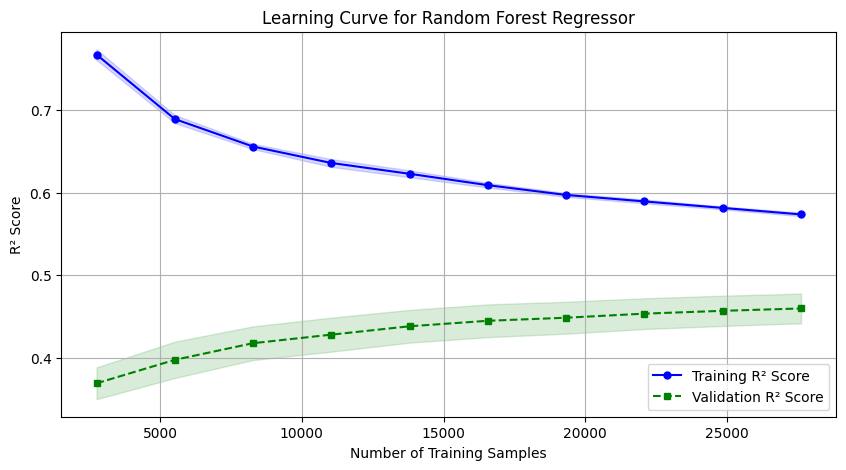

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import  make_scorer

scoring = make_scorer(r2_score)

train_sizes, train_scores, test_scores = learning_curve(estimator=rfh,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,scoring=scoring,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R² Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R² Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.title('Learning Curve for Random Forest Regressor')
plt.xlabel('Number of Training Samples')
plt.ylabel('R² Score')
plt.legend(loc='lower right')
plt.show()


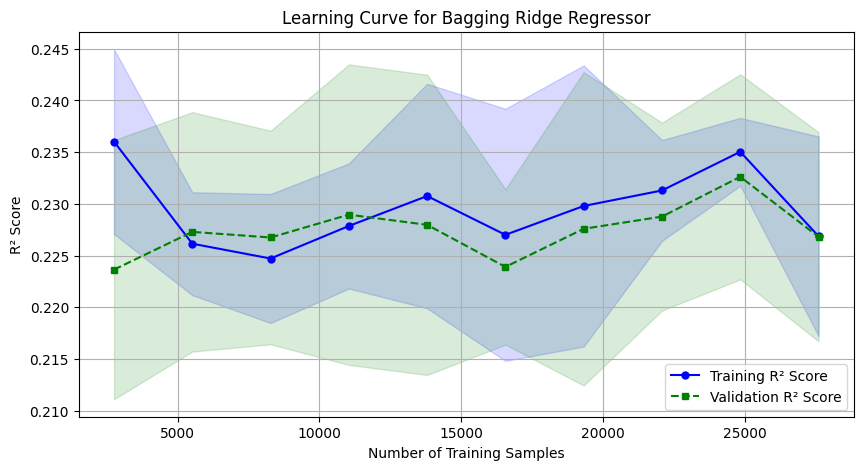

In [155]:
train_sizes, train_scores, test_scores = learning_curve(estimator=bagging_ridge_h,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,scoring=scoring,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R² Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R² Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.title('Learning Curve for Bagging Ridge Regressor')
plt.xlabel('Number of Training Samples')
plt.ylabel('R² Score')
plt.legend(loc='lower right')
plt.show()

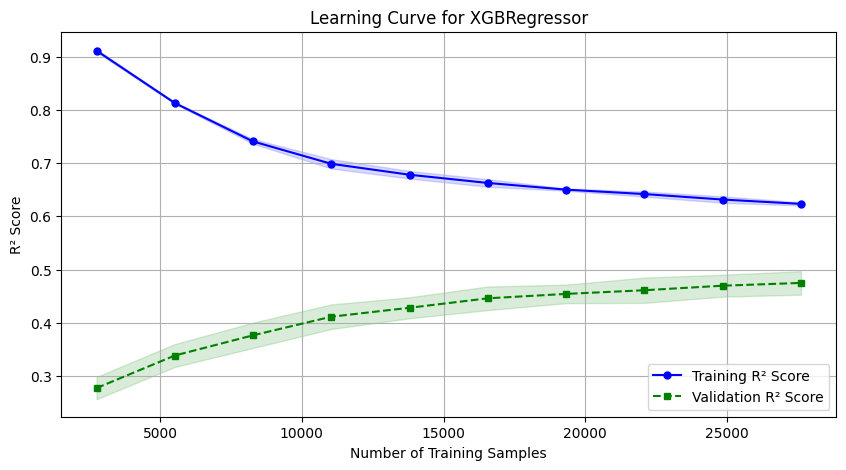

In [156]:
train_sizes, train_scores, test_scores = learning_curve(estimator=xgbm,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,scoring=scoring,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R² Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R² Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.title('Learning Curve for XGBRegressor')
plt.xlabel('Number of Training Samples')
plt.ylabel('R² Score')
plt.legend(loc='lower right')
plt.show()

### Conclusion 

XGBRegressor with hyperparameter is outperforming all models.

Though R2 score of random forest  is similar but its error values are high ,hence it's not considered.